In [38]:
# First step always is to import necessary libraries
import pandas as pd
import numpy as np
# os.listdir() will get u everything that's in a directory
import os

In [328]:
# Our data folder contains 12 different CSV's first we have to merge all those file into a single file

# to get all 12 data files from the directory
files = [file for file in os.listdir(r"C:\Users\HITESH KUMAR\OneDrive\Documents\DA Projects\Pandas_project2\SalesAnalysis\Sales_Data")]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(r"C:\Users\HITESH KUMAR\OneDrive\Documents\DA Projects\Pandas_project2\SalesAnalysis\Sales_Data\\"+file, delim_whitespace=True)
    all_months_data = pd.concat([all_months_data, df])
"C:\Users\HITESH KUMAR\OneDrive\Documents\DA Projects\Pandas_project2\SalesAnalysis\Sales_Data\Sales_April_2019.csv"
all_month_data.head()

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [254]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [255]:
for col in all_data.columns:
    pct_missing = np.mean(all_data[col].isnull())
    print("{} - {}%".format(col,pct_missing))

Order ID - 0.002916778164302917%
Product - 0.002916778164302917%
Quantity Ordered - 0.002916778164302917%
Price Each - 0.002916778164302917%
Order Date - 0.002916778164302917%
Purchase Address - 0.002916778164302917%


In [256]:
all_data.dropna(axis= 'index' , how='any', inplace = True)

In [268]:
# Task 2: Add  month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


In [258]:

all_data = all_data.drop(all_data[all_data['Month'] == 'Or'].index)

In [269]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


In [264]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
all_data.drop(['Month'], axis = 1, inplace = True)

In [ ]:
filt = all_data["Month"] == "Or"
all_data[filt]

In [37]:
#### Question 1: What was the best month for sales? how much was earned that month ?

In [270]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('float64')
all_data['Price Each'] = all_data['Price Each'].astype('float64')


In [271]:
#Add sales column
all_data["Sales"] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


In [272]:
results = all_data.groupby('Month').sum()[['Quantity Ordered', 'Price Each', 'Sales']]   

# By examining the below data we can determine that December has highest sales and January has least sales. we can further
# by visualizing this data

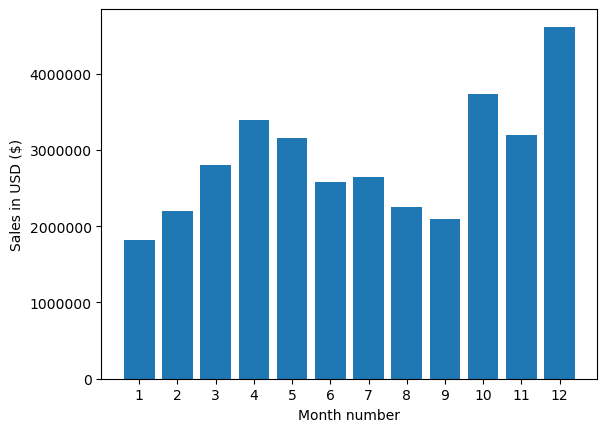

In [273]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['Sales'])
plt.ticklabel_format(style='plain') # to get normal numbers on y axis instead of le6
plt.xticks(months) # to get every month value instead of missing something out
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")
plt.show()

In [274]:
# Question2 : what city has highest number of sales?

In [275]:
fd = all_data['Purchase Address']
fd = fd.str.split(',', expand = True)
all_data["City"] = fd[1]+" ("+fd[2]+')' # we have cities of same which is of different states

# can also use .apply() use all_data['city'] = all_data["Purchase Address"].apply(lambda x: x.split(',')[1])+ '' +

In [276]:
city_results = all_data.groupby('City').sum()[['Quantity Ordered', 'Price Each', 'Sales']]

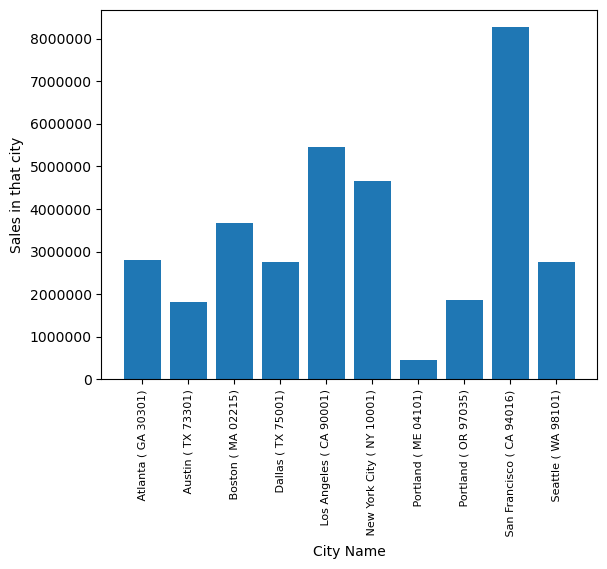

In [277]:
cities = list(city_results.index.values)
plt.bar(cities, city_results['Sales'])
plt.ticklabel_format(axis='y',style='plain')
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel("City Name")
plt.ylabel('Sales in that city')
plt.show()

In [278]:
# On analysing above plot we can say that SanFrancisco has highest sales

In [279]:
# Question3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [283]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas ( TX 75001)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston ( MA 02215)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles ( CA 90001)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles ( CA 90001)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles ( CA 90001)


In [285]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

In [286]:
all_data['Hour'] = all_data["Order Date"].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas ( TX 75001),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston ( MA 02215),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles ( CA 90001),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles ( CA 90001),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles ( CA 90001),9,27


In [287]:
all_data.groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


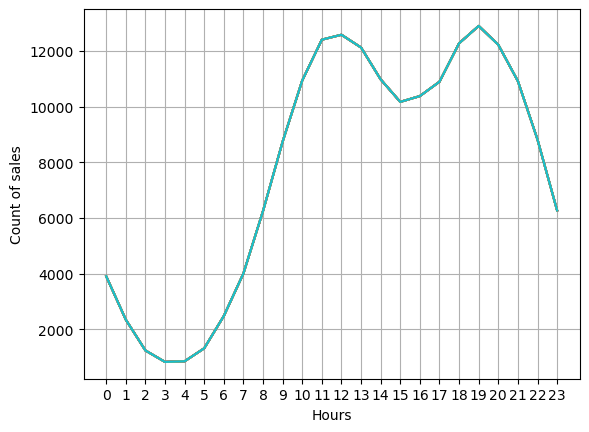

In [288]:
hours = list(all_data.groupby('Hour').count().index.values)
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Count of sales')
plt.show()

In [289]:
# after analysing this chart we can say that right before 11AM or at around 6PM to 9PM we can publish our ads

In [290]:
# Question4: What products are most often sold together?
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas ( TX 75001),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston ( MA 02215),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles ( CA 90001),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles ( CA 90001),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles ( CA 90001),9,27


In [291]:
# to check all the orders having multiples goods, we need to find duplicates of Order ID
df = all_data[all_data["Order ID"].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

C:\Users\HITESH KUMAR\AppData\Local\Temp\ipykernel_17432\3713911972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [292]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [293]:
# What product sold the most and why do you think it sold the most ?

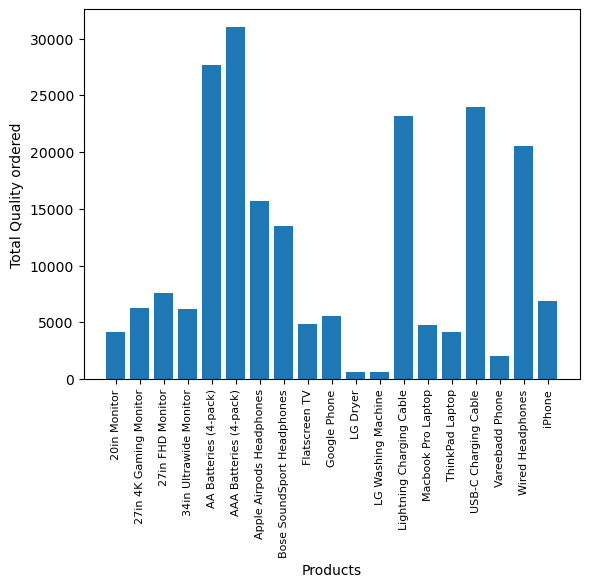

In [294]:
product_group = all_data.groupby('Product')[["Quantity Ordered",'Price Each', 'Month', 'Minute']]
quantity_ordered = product_group.sum()["Quantity Ordered"]
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.xlabel('Products')
plt.ylabel('Total Quality ordered')
plt.show()

C:\Users\HITESH KUMAR\AppData\Local\Temp\ipykernel_17432\2185298770.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


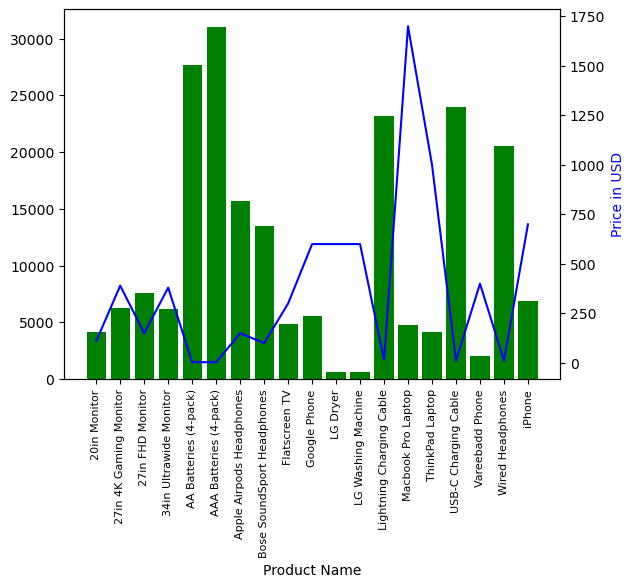

In [314]:
# we need to correlate the price of the products with the sales to understand and further analyse the reason for the sales 
prices = all_data.groupby('Product')[["Quantity Ordered",'Price Each', 'Month', 'Minute']].mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() # twinx() creates a twin y axis with sharing the same x-axis
ax1.bar(products, quantity_ordered, color= 'g')
ax2.plot(products, prices,'b-')

ax1.set_xlabel('Product Name')
ax2.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price in USD', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

In [315]:
#On analysing above data we can say that AA&AAA batteries have no. of high sales due to the low cost it have.

In [325]:
dff = pd.read_csv(r"C:\Users\HITESH KUMAR\OneDrive\Documents\DA Projects\Pandas_project2\SalesAnalysis\Sales_Data\Sales_August_2019.csv")

In [326]:
dff

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"
